# Import Libraries

In [65]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import SparseCategoricalCrossentropy


# Load Dataset

In [66]:
(X_train,Y_train),(x_test,y_test)=mnist.load_data()

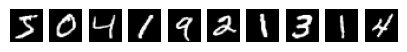

In [67]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(5, 5))
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [68]:
print(X_train.shape,Y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Preprocessing the Data

when working with categorical or multiclass classification problems,
it is common to represent the target or output variable using one-hot encoding.
It converts categorical variables into a binary matrix 

In [78]:
## X_train.shape[0] gives the no.of samples i.e 60000
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


## y=[1,2,0,1] with num_classes=3 the using one-hot encoding it converts y into [[0,1,0],[0,0,1],[1,0,0],[0,1,0]]
num_classes=10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



## convert the datatype into float(numerical)
X_train=X_train.astype('float32')
x_test=x_test.astype('float32')

## color intensity range:(0-255),normalization is done so that model performs better when all the values are in range(0,1)
X_train/=255
x_test/=255

## Print the shape
print("X_train shape: ", X_train.shape)


X_train shape:  (60000, 28, 28, 1)


# Creating our CNN Model

In [75]:
from keras.callbacks import EarlyStopping
batch_size = 128
epochs = 10

model = Sequential()

## Here, 32 and 64 are the no. of filters and  a 3x3 kernel size means that each convolutional filter will scan a 3x3 neighborhood of pixels at a time.
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

## MaxPooling helps in reducing the size to half
model.add(MaxPooling2D(pool_size=(2, 2)))

## It randomnly drops out a fraction of neurons to avoid overfitting
model.add(Dropout(0.25))

## it flattens the dimension from 3D to 1D
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(0.001),metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

print(y_test.shape,num_classes)

(10000, 10) 10


## Fit the Model

In [76]:
hist = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test), callbacks=[early_stopping])
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 97s 204ms/step - loss: 0.1935 - accuracy: 0.9408 - val_loss: 0.0484 - val_accuracy: 0.9828
Epoch 2/10
469/469 [==============================] - 99s 212ms/step - loss: 0.0653 - accuracy: 0.9803 - val_loss: 0.0339 - val_accuracy: 0.9879
Epoch 3/10
469/469 [==============================] - 100s 214ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0353 - val_accuracy: 0.9873
Epoch 4/10
469/469 [==============================] - 97s 206ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0297 - val_accuracy: 0.9903
Epoch 5/10
469/469 [==============================] - 97s 207ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 6/10
469/469 [==============================] - 98s 208ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0255 - val_accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 97s 207ms/step - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0277 - val_a

# Evaluate the Model

In [77]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027083266526460648
Test accuracy: 0.9918000102043152
